In [1]:
import matplotlib.pyplot as plt
import numpy as np
import csv
from scipy.optimize import curve_fit

In [2]:
#load tide data from file 'tidetable.txt'
def loadTides(filename = 'tidetable.txt'):
    tideEntries = csv.reader(open(filename),delimiter='\t')
    for i in range(14):
        next(tideEntries)
    tideHeights=[]
    for row in tideEntries:
        tideHeights.append(np.float(row[3]))
    return tideHeights

In [3]:
#plot loaded tide data
def plotTides():
    tideHeights = loadTides()
    timeInHours = np.arange(len(tideHeights))
    plt.figure()
    plt.plot(timeInHours,tideHeights, 'b-', label='tide Height')
    plt.legend()
    plt.show()

In [4]:
#plot tide data for the current month and the next month
def plotTwoTides():
    earlyTideHeights = loadTides('tidetable.txt')
    earlyTimeInHours = np.arange(len(earlyTideHeights))
    lateTideHeights = loadTides('tidetable2.txt')
    lateTimeInHours = np.arange(len(lateTideHeights)) + earlyTimeInHours.max()
    plt.figure()
    plt.plot(earlyTimeInHours,earlyTideHeights, 'b-', label='early tide heights')
    plt.plot(lateTimeInHours,lateTideHeights, 'r-', label='late tide heights')
    plt.xlabel('time, hours')
    plt.ylabel('height, meters')
    plt.title('Santa Barbara tide heights')
    plt.legend()
    plt.show()

In [5]:
#the function for curveFit() demo
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

In [6]:
#a demo of curve fitting
def curveFit():
    xdata = np.linspace(0, 4, 50)
    y = func(xdata, 2.5, 1.3, 0.5)
    np.random.seed(1729)
    #look at this line, and compare it to what you just did. This is written rather pythonically
    y_noise = 0.2 * np.random.normal(size=xdata.size)
    ydata = y + y_noise
    plt.figure()
    plt.plot(xdata, ydata, 'b-', label='data')
    
    popt, pcov = curve_fit(func, xdata, ydata)
    print(popt)
    
    plt.plot(xdata, func(xdata, *popt), 'r-',
             label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
    
    popt, pcov = curve_fit(func, xdata, ydata, bounds=(0, [3., 1., 0.5]))
    
    plt.plot(xdata, func(xdata, *popt), 'g--',
             label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
    
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

In [7]:
#returning the possible freqencies and amplitude for each frequencies for a FFT
def absFFT(times, amplitude):
    result = np.abs(np.fft.fft(amplitude))/len(times)
    freq = len(times)/times[-1]*np.abs(np.fft.fftfreq(len(times)))
    return  freq, result

In [8]:
#similar to absFFT, but applying definition for fourier transformation rather than using numPy.fft.fft()
def absSlowFT(times, amplitude):
    freq = np.linspace(0, 100, len(times))
    result = []
    for i in freq:
        sinAmp, cosAmp = getFourierComponent(times, amplitude, i)
        result.append(np.abs(sinAmp/2 + cosAmp/2))
    return freq, result

In [9]:
#plotting the example function and its frourier transformation
def testFourier():
    times = np.linspace(0,10,2000)
    f1 = 12  #in Hertz
    f2 = 20  #in Hertz
    testFunction = np.cos(times * f1 * 2 * np.pi) + (2*np.sin(times * f2 * 2 * np.pi))
    frequencies,powerSpectrum = absFFT(times,testFunction)

    plt.figure()
    plt.subplot(211)
    plt.plot(times,testFunction, 'g-', label='test Function')
    plt.xlabel('time, seconds')
    plt.legend()
    
    plt.subplot(212)
    plt.plot(frequencies,powerSpectrum, 'b-',label='fourier transform. Should have peaks at 12 and 20')
    plt.xlabel('frequency, Hz')
    plt.legend()

In [10]:
#plotting the results of absFFT(times, testFunction) and absSlowFT(times, testFunction)
def compareByTestFourier():
    times = np.linspace(0,10,2000)
    f1 = 12  #in Hertz
    f2 = 20  #in Hertz
    testFunction = np.cos(times * f1 * 2 * np.pi) + (2*np.sin(times * f2 * 2 * np.pi))
    frequencies,powerSpectrum = absFFT(times,testFunction)
    frequenciesnew,powerSpectrumnew = absSlowFT(times,testFunction)
    
    plt.figure()
    plt.subplot(211)
    plt.plot(frequencies,powerSpectrum, 'b-',label='Fast fourier transform')
    plt.xlabel('frequency, Hz')
    plt.legend()
    
    plt.subplot(212)
    plt.plot(frequenciesnew,powerSpectrumnew, 'b-',label='Slow fourier transform')
    plt.xlabel('frequency, Hz')
    plt.legend()

In [11]:
#fourier transformation to get the real and imaginary parts
def getFourierComponent(times,data,f):
    sinwave = 2 * data * np.sin(2 * np.pi * f * times)  / len(times)
    coswave = 2 * data * np.cos(2* np.pi * f *  times)  / len(times)
    sinAmp = np.sum(sinwave)
    cosAmp = np.sum(coswave)
    return sinAmp, cosAmp

In [12]:
#plot the original data and the FT fitted curve
def overlayFourier():
    times = np.linspace(0,1,2000)
    f1 = 12  #in Hertz
    f2 = 20  #in Hertz
    testFunction = np.cos(times * f1 * 2 * np.pi) + (2*np.sin((times * f2 * 2 * np.pi) + 1))
    frequencies,powerSpectrum = absFFT(times,testFunction)
    
    f = 20 
    sinAmp,cosAmp = getFourierComponent(times,testFunction,f)
    fitData = sinAmp * np.sin(f * 2 * np.pi * times) + cosAmp * np.cos(f * 2 * np.pi * times)

    plt.figure()
    plt.plot(times,testFunction, 'b-', label='test Function')
    plt.plot(times,fitData, 'g-', label='best fit at %d Hz'%f)
    plt.xlabel('time, seconds')
    plt.legend()

In [13]:
#plotting loaded tide data and the fourier transform
def plotTidesFourier():
    data = loadTides()
    timeInHours = np.arange(len(data))
    frequencies, powerSpectrum = absFFT(timeInHours, data)
    powerSpectrum[0] = 0
    
    plt.figure()
    plt.subplot(211)
    plt.plot(timeInHours, data, 'g-', label='tidewave')
    
    plt.xlabel('time, seconds')
    plt.legend()
    
    plt.subplot(212)
    plt.plot(frequencies, powerSpectrum, 'b-',label='fourier transform.')
    plt.xlabel('frequency, Hz')
    plt.legend()
    
    return 0

In [14]:
#pick appropriate frequencies for tide fitting
def findFrequency():
    significance = []
    data = loadTides()
    timeInHours = np.arange(len(data))
    frequencies, powerSpectrum = absFFT(timeInHours, data)
    for i in range (1,len(powerSpectrum)):
        if powerSpectrum[i] > 0.1:
            significance.append(frequencies[i])
    return significance

In [15]:
#pick appropriate frequencies for tide fitting
def findFrequency2(filename = 'tidetable.txt'):
    significance = []
    data = loadTides(filename)
    timeInHours = np.arange(len(data))
    frequencies, powerSpectrum = absFFT(timeInHours, data)
    theSignif = powerSpectrum.copy()
    theSignif.sort()
    thershold = theSignif[-11]
    for i in range (1,len(powerSpectrum)):
        if powerSpectrum[i] >= thershold:
            significance.append(frequencies[i])
    return significance

In [16]:
#the math model for tide fitting
def fitFunction2(times,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,const,phase):
    function = const + A1* np.sin(f1 * 2*np.pi* times) \
    +A2 * np.cos(f2 *2*np.pi* times) \
    +A3 * np.sin(f3 *2*np.pi* times) \
    +A4 * np.cos(f4 *2*np.pi* times) \
    +A5 * np.sin(f5 *2*np.pi* times) \
    +A6 * np.cos(f6 *2*np.pi* times) \
    +A7 * np.sin(f7 *2*np.pi* times) \
    +A8 * np.cos(f8 *2*np.pi* times) \
    +A9 * np.sin(f9 *2*np.pi* times) \
    +A10 * np.cos(f10 *2*np.pi* times) 
    return function

In [17]:
#the math model for tide fitting
def fitFunction(times,A1,A2,A3,A4,A5,A6,const,phase):
    function = const + A1* np.sin(0.08067 * 2*np.pi* times) +A2*np.cos(0.08067 *2*np.pi* times) +A3 * np.sin(0.04172* 2*np.pi * times) +A4 * np.cos(0.04172 *2*np.pi* times) +A5 * np.sin(0.03894* 2*np.pi * times) +A6 * np.cos(0.03894 *2*np.pi* times) 
    return function


In [18]:
#plotting prediction for next month and error
def predictNextMonthsTides(filename = 'tidetable.txt',filename2 = 'tidetable2.txt'):
    hours = 24 * 28
    tideHeights = loadTides(filename) 
    tideHeights2 = loadTides(filename2)
    times=[]
    dayCounter = 0
    for i in range(0,len(tideHeights)):
        times.append(np.float(dayCounter))
        dayCounter = dayCounter + 1
    times = np.asarray(times)
    predictTimes = []
    for i in range (0, hours):
        predictTimes.append(times[i]+times[-1]+1)
    popt, pcov = curve_fit(fitFunction, times, tideHeights)
    
    predictTimes = np.asarray(predictTimes)
    fitResult = fitFunction(predictTimes, *popt)
    error = []
    totalError = 0
    for i in range (0,hours):
        error.append(tideHeights[i]-tideHeights2[i])
        totalError += np.abs(tideHeights[i]-tideHeights2[i])**2/hours
    RMSE = np.sqrt(totalError)

    plt.figure()
    plt.subplot(211)
    plt.plot(predictTimes, fitResult,label='predict result')
    plt.plot(times, tideHeights,label='original data')
    plt.title('Prediction in 28 days')
    plt.xlabel('hours')
    plt.ylabel('tide height')
    plt.legend()
    
    plt.subplot(212)
    plt.plot(predictTimes, error , label='error, RMS = %.3f' % RMSE)
    plt.xlabel('hours')
    plt.ylabel('Error')
    plt.legend()
    plt.show()
    return 0

In [19]:
#plotting prediction for next day and error
def predictNextDaysTides(filename = 'tidetable.txt',filename2 = 'tidetable2.txt'):
    hours = 24
    tideHeights = loadTides(filename) 
    tideHeights2 = loadTides(filename2)
    times=[]
    dayCounter = 0
    for i in range(0,len(tideHeights)):
        times.append(np.float(dayCounter))
        dayCounter = dayCounter + 1
    times = np.asarray(times)
    predictTimes = []
    for i in range (0, hours):
        predictTimes.append(times[i]+times[-1]+1)
    popt, pcov = curve_fit(fitFunction, times, tideHeights)
    predictTimes = np.asarray(predictTimes)
    fitResult = fitFunction(predictTimes, *popt)
    error = []
    totalError = 0
    for i in range (0,hours):
        error.append(tideHeights[i]-tideHeights2[i])
        totalError += np.abs(tideHeights[i]-tideHeights2[i])**2/hours
    RMSE = np.sqrt(totalError)
    
    plt.figure()
    plt.subplot(211)
    plt.plot(predictTimes, fitResult,label='predict result')
    plt.plot(times, tideHeights,label='original data')
    plt.title('Prediction in 24 hours')
    plt.xlabel('hours')
    plt.ylabel('tide height')
    plt.legend()
    
    plt.subplot(212)
    plt.plot(predictTimes, error , label='error, RMS = %.3f' % RMSE)
    plt.xlabel('hours')
    plt.ylabel('Error')
    plt.legend()
    plt.show()
    return 0

[0.03894297635605007, 0.04172461752433936, 0.08066759388038944, 0.08066759388038944, 0.04172461752433936, 0.03894297635605007]


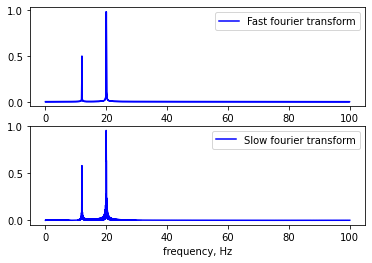

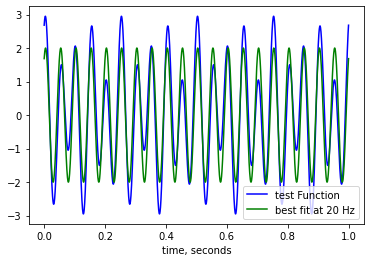

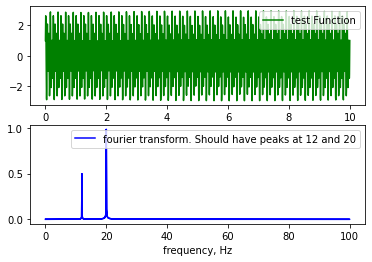

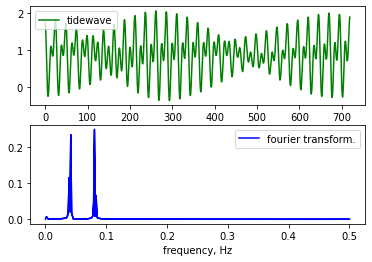

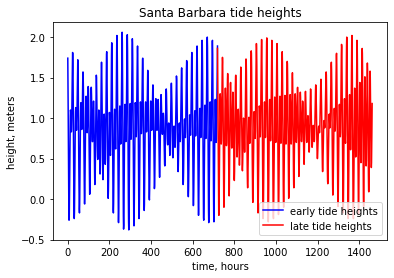

C:\Users\LogicGambler\anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


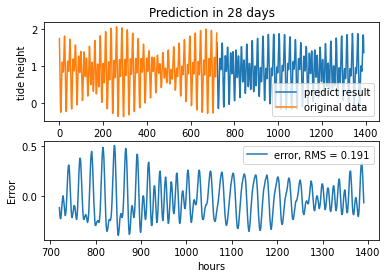

C:\Users\LogicGambler\anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


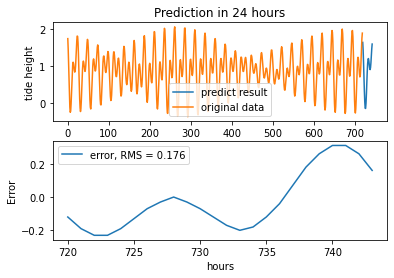

0

In [20]:
print(findFrequency())
compareByTestFourier()
overlayFourier()
testFourier()
plotTidesFourier()
plotTwoTides()
predictNextMonthsTides()
predictNextDaysTides()